<a href="https://colab.research.google.com/github/Alvaro-Garcia-Parra/AA_GRUPO3/blob/main/LAB01_Pr1AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo
El problema del alquiler de la vivienda ya forma parte del contexto de la mayoría de grandes ciudades del mundo. Hay varios factores que se enumeran como parte del problema: el turismo masivo, la distribución de las ciudades o el auge de los apartamentos turísticos como es el caso de AirBnB. Lo que si queda claro es que los datos obtenidos del portal sirven para obtener una radiografía más o menos valida de la ciudad. A través del dataset proporcionado en Moodle en el que se miden las estancias en los últimos años en la ciudad de New York. Hay varias preguntas que nos hacemos, que contestaremos a continuación.

# Resolución
## Apartado 1
El barrio de Williamsburg es uno de los barrios de moda hoy en día. Desde 2005 ha pasado de ser un distrito donde principalmente se encontraban fabricas a acoger una gran cantidad de gente joven y nuevos negocios. ¿Teniendo en cuenta los datos proporcionados que posición en términos de popularidad/calidad se puede decir que ostenta el barrio con respecto a los demás que forma New York? 
 
Lo primero que tendremos que hacer es cargar todo el archivo csv en un DataFrame para poder manipularlos. Habrá que comprobar si existen datos redundantes o anómalos.

Para medir  la popularidad/calidad del barrio, tendremos primero  en cuenta el número de apartamentos  de calidad según los usuarios. Para ello, lo primero será clasificar los apartamentos como “Muy Malos”, “Malos”, “Regulares”, “Buenos” y “Muy Buenos”. Para ello primero haremos un par de transformaciones de los datos. La columna de reseñas por mes, se dividirán en 3 rangos iguales, después dependiendo del valor concreto que tenga cada apartamento se le asignarán las etiquetas: “Baja”, “Media” y ”Alta”. Para la columna que indica el número de días que está disponible asignaremos las etiquetas de menor valor a mayor de la siguiente manera: “Poco disponible”, “Disponible normalmente” y “Altamente disponible”. Finalmente crearemos una columna para clasificar los apartamentos, teniendo en cuenta las siguientes reglas: 

• Si Reseñas es Baja y Disponibilidad es “Poco disponible” -> “Bueno”

• Si Reseñas es Media y Disponibilidad es “Poco disponible” -> “Bueno”

• Si Reseñas es Alta y Disponibilidad es “Poco disponible” -> “Muy Bueno”

• Si Reseñas es Baja y Disponibilidad es “Disponible normalmente” -> “Regular”

• Si Reseñas es Media y Disponibilidad es “Disponible normalmente” -> “Regular”

• Si Reseñas es Alta y Disponibilidad es “Disponible normalmente” -> “Bueno” 

• Si Reseñas es Baja y Disponibilidad es “Altamente disponible” -> “Malo” 

• Si Reseñas es Media y Disponibilidad es “Altamente disponible” -> “Malo” 

• Si Reseñas es alta y Disponibilidad es “Altamente disponible” -> “Muy malo” 


In [73]:
import pandas as pd
filename = 'airbnb.csv'
data = pd.read_csv(filename, sep = ',')

print(data.shape)
data.head(10)

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [52]:
# Eliminar los valores duplicados
data = data.drop_duplicates()

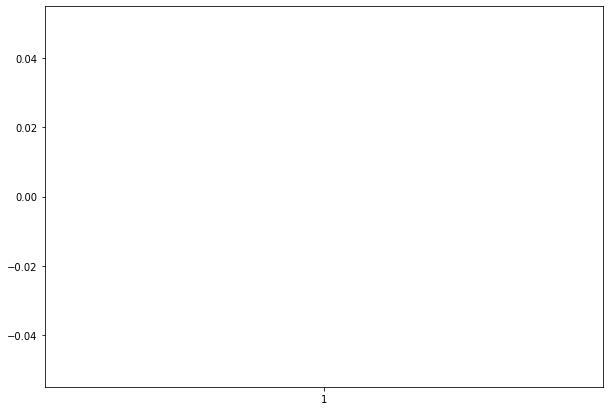

In [53]:
# Eliminar los valores anómalos (Outliers)
# Importar librerías
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize =(10, 7))

# Crear gráfico
plt.boxplot(data["reviews_per_month"])
 
# Dibujar gráfico
plt.show()

In [54]:
# Decidimos que en la columna "reviews_per_month", las casillas que esten NaN
# Las rellenaremos con un 0, ya que no ha habido ninguna revisión.
data["reviews_per_month"].replace(np.nan,0)

0        0.21
1        0.38
2        0.00
3        4.64
4        0.10
         ... 
48890    0.00
48891    0.00
48892    0.00
48893    0.00
48894    0.00
Name: reviews_per_month, Length: 48895, dtype: float64

In [55]:
# Clasificar la columna "reviews_per_month" en 3 rangos iguales


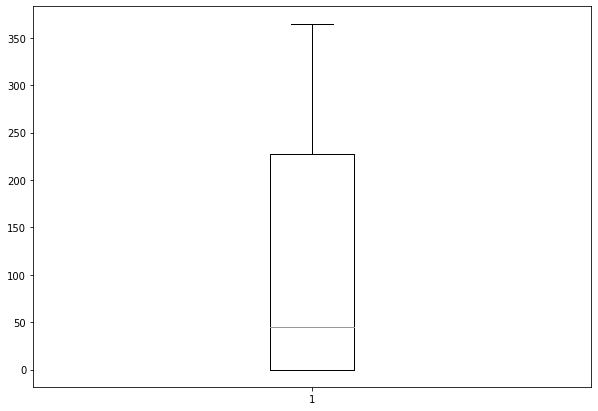

In [56]:
fig = plt.figure(figsize =(10, 7))

# Crear gráfico
plt.boxplot(data["availability_365"])
 
# Dibujar gráfico
plt.show()

In [74]:
# Clasificar la columna "availability_365" en 3 rangos iguales
data.loc[data["availability_365"] <= 121, "availability_365"] = "Poco disponible"
data.loc[data["availability_365"].astype('str') and  data["availability_365"] > 121 and data["availability_365"] <= 243, "availability_365"] = "Disponible normalmente"
data.loc[data["availability_365"].astype('int32') and  data["availability_365"] > 243 and data["availability_365"] <= 365, "availability_365"] = "Altamente disponible"

ValueError: ignored

In [71]:
data["availability_365"].astype('str')

0                    365
1                    355
2                    365
3                    194
4        Poco disponible
              ...       
48890    Poco disponible
48891    Poco disponible
48892    Poco disponible
48893    Poco disponible
48894    Poco disponible
Name: availability_365, Length: 48895, dtype: object